In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()  # Select receipts.db
#added synthetic data for testing graphs.

db_filename = list(uploaded.keys())[0]
conn = sqlite3.connect(db_filename)


df = pd.read_sql_query("SELECT * FROM receipts", conn)
conn.close()


df.head()



Saving receipts.db to receipts.db


,id,raw_text,category,date,amount
0,1,Big Bazaar,Groceries,2025-08-09,1250.50
1,2,Amazon,Electronics,2025-08-10,4999.99
2,3,"Big Bazaar - TATA SAMPANN DAL 1KG, FORTUNE OIL 1L",Groceries,2025-08-01,1250.50
3,4,Amazon - Sony Headphones WH-1000XM4,Electronics,2025-08-02,24990.00
4,5,Swiggy - Pizza Hut Veggie Supreme,Food,2025-08-03,599.00


In [3]:
import seaborn as sns
# Adjust below if your DB has different column names
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Drop rows with missing key values
df = df.dropna(subset=['date', 'category', 'amount'])

# Extract month/year/week/hour info
df['month'] = df['date'].dt.to_period('M')
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour


plt.rcParams['font.family'] = 'DejaVu Sans'  # change font
sns.set_theme(style="darkgrid", palette="pastel")  # or "darkgrid"



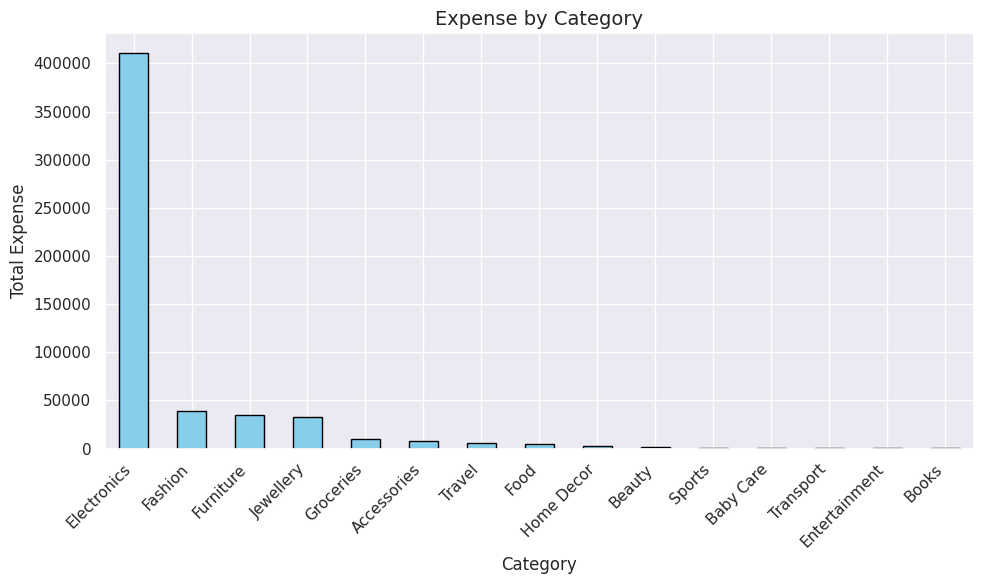

In [4]:

category_expenses = df.groupby("category")["amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_expenses.sort_values(ascending=False).plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title("Expense by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Expense", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


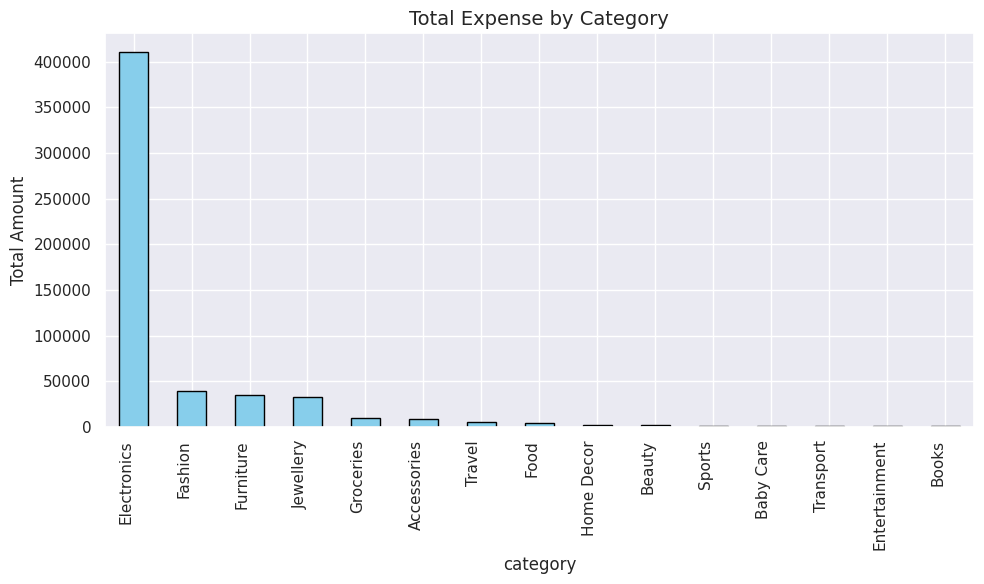

In [5]:
#Top categories- BAR CHART
plt.figure(figsize=(10,6))
df.groupby('category')['amount'].sum().sort_values(ascending=False).plot(
    kind='bar', color='skyblue', edgecolor='black'
)
plt.title("Total Expense by Category", fontsize=14)
plt.ylabel("Total Amount")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

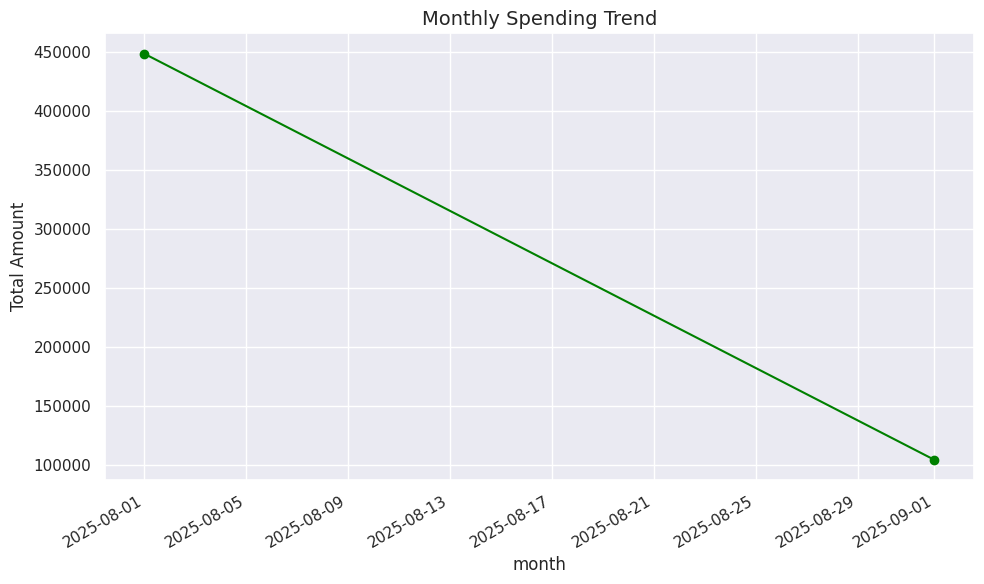

In [6]:
# Monthly trend- Line chart
monthly_expense = df.groupby(df['month'].dt.to_timestamp())['amount'].sum()
plt.figure(figsize=(10,6))
monthly_expense.plot(marker='o', color='green')
plt.title("Monthly Spending Trend", fontsize=14)
plt.ylabel("Total Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

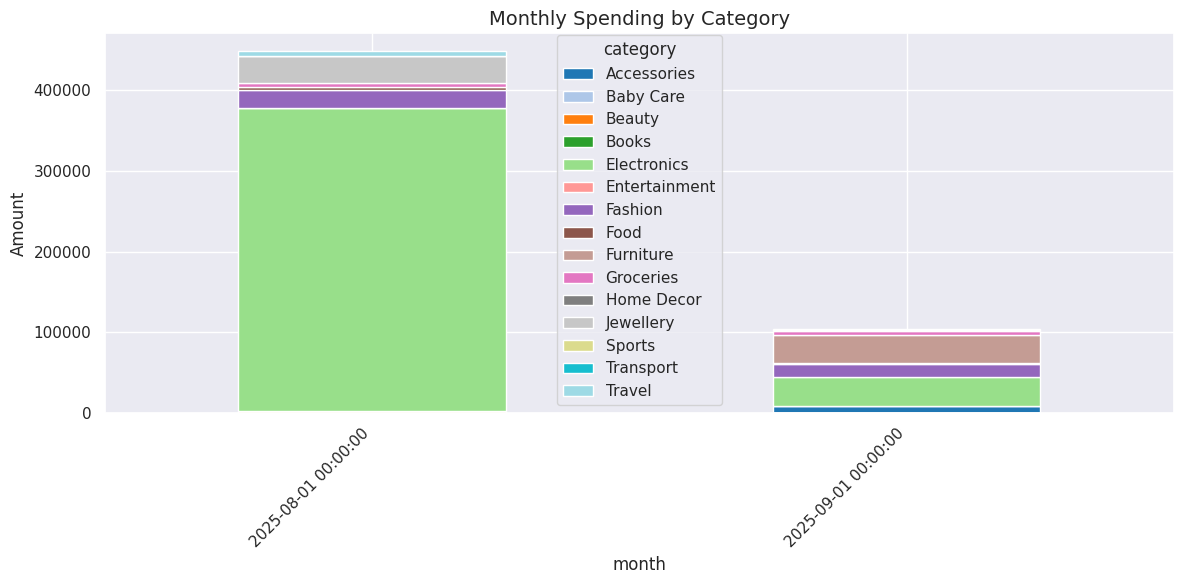

In [7]:
# --- CHART 3: Stacked bar chart - Monthly spend by category ---
monthly_cat = df.groupby([df['month'].dt.to_timestamp(), 'category'])['amount'].sum().unstack(fill_value=0)
monthly_cat.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Monthly Spending by Category", fontsize=14)
plt.ylabel("Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
